---
## Script para el análisis de secuencias con TraMineR.
>## Zona Norte
---

**Autor**: Rodrigo Hernández A.  
**Tutora**: Dra. Nery Sofía Huerta.  
**Fecha**: 2 de Octubre, 2023.  

---

### Descripción:
>Script para el análisis de secuencias con TraMineR de la **zona Norte**, la cual consta de 5 regiones y 24 comunas con juzgados que registran el delito de conducción en estado de ebriedad.

**Entorno**: R en Google Colab  
**Proyecto**: TFM - Máster en Big Data y Ciencia de Datos - Universidad Internacional de Valencia (VIU).

---

In [ ]:
# ---- Instalación de paquetes necesarios ----
install.packages("readxl")
install.packages("TraMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# ---- Importación de paquetes necesarios ----
library(readxl)
library(TraMineR)
library(cluster)

In [ ]:
# ---- Carga de datos ---
#Descarga del conjunto de datos:
#    https://drive.google.com/drive/folders/1nyZ_bwVZIJUMBoozzjs8pi3jO1igzb7N
ZNO <- read_excel("/content/01-zonaNorte.xlsx")

In [ ]:
ZNO <- as.data.frame(ZNO)
rownames(ZNO) <-  ZNO$Comuna
# ************************************************************************
seqstatl(ZNO[, 1:98])

ZNO.alphabet <- c("sobre","igual","bajo","sin_juzgado")
ZNO.labels <- c("Sobre","Igual","Bajo","Sin juzgado")
ZNO.scodes <- c("SO", "IG", "BA", "SJ")
ZNO.seq <- seqdef(ZNO, 2:98, alphabet = ZNO.alphabet, states = ZNO.scodes,
                  labels = ZNO.labels, xtstep = 4)
colores <- c( "#D98880","#2980B9","#73C6B6","#EB984E")  #Rojo, Azul, Verde, Naranja   https://htmlcolorcodes.com/

[1] "ALTO HOSPICIO" "ANDACOLLO"     "ANTOFAGASTA"   "ARICA"        
 [5] "bajo"          "CALAMA"        "CALDERA"       "CHAÑARAL"     
 [9] "COMBARBALA"    "COPIAPO"       "COQUIMBO"      "DIEGO ALMAGRO"
[13] "FREIRINA"      "igual"         "ILLAPEL"       "IQUIQUE"      
[17] "LA SERENA"     "LOS VILOS"     "MARIA ELENA"   "MEJILLONES"   
[21] "OVALLE"        "POZO ALMONTE"  "sin_juzgado"   "sobre"        
[25] "TALTAL"        "TOCOPILLA"     "VALLENAR"      "VICUÑA"

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  sobre       SO       Sobre

     2  igual       IG       Igual

     3  bajo        BA       Bajo

     4  sin_juzgado SJ       Sin juzgado

 [>] 24 sequences in the data set

 [>] min/max sequence length: 97/97



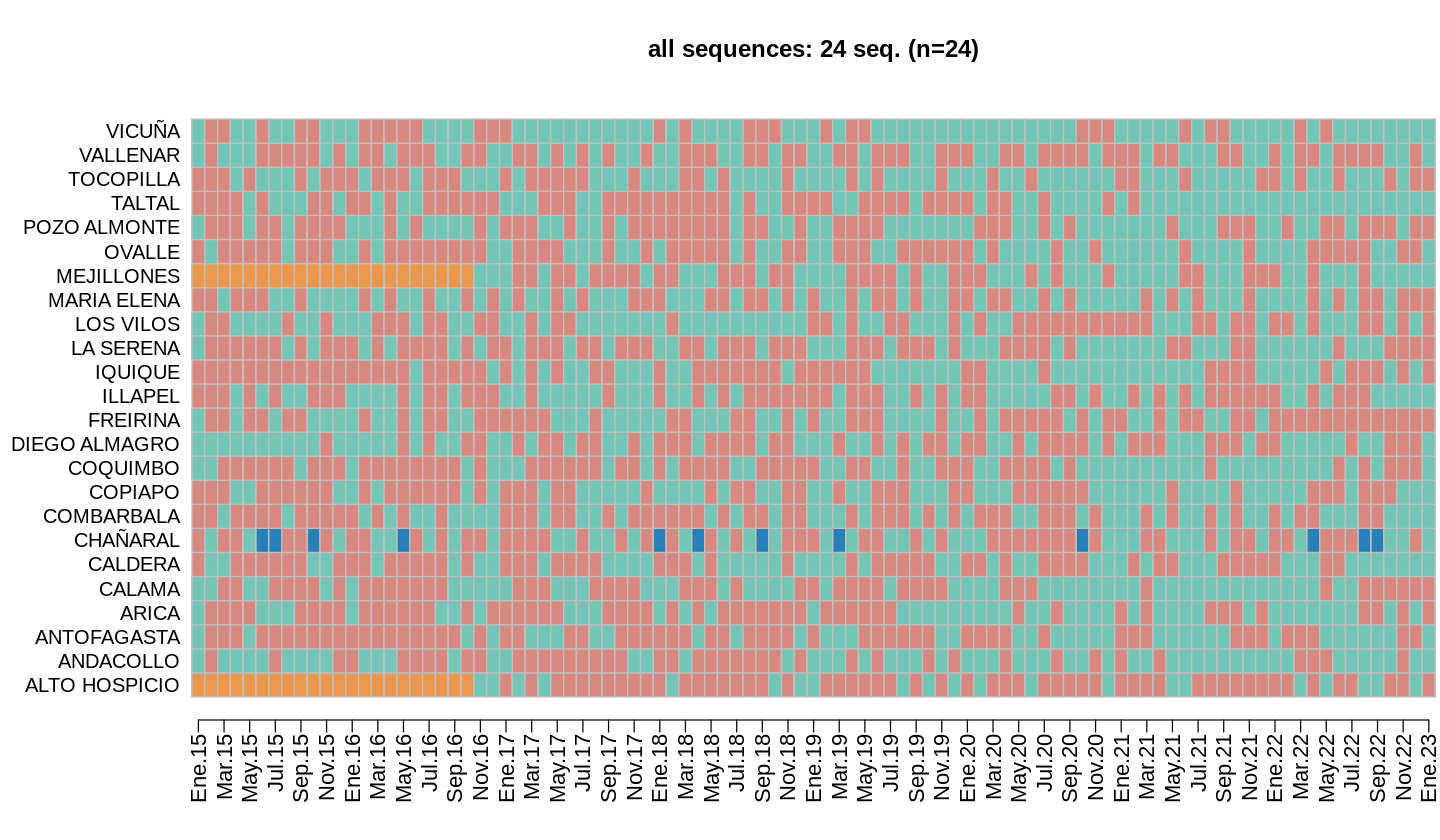

In [ ]:
#*************** Visualización de todas las secuencias **********
par(mar = c(5.0, 8.0, 4.0, 0.2)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqIplot(ZNO.seq, with.legend = FALSE, border = "grey", ytlab = "id", ylas = 1, ylab = "", cex.axis = 1.0 , xtlab = FALSE, cpal = colores, main = 'all sequences: 24 seq. (n=24)', xtstep = 2)
text(x = seq(1, length(colnames(ZNO.seq)), by = 2)-.5, y = par("usr")[3] - 0.6, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], srt = 90, adj = c(1, 0.5), xpd = TRUE, cex = 1.1)

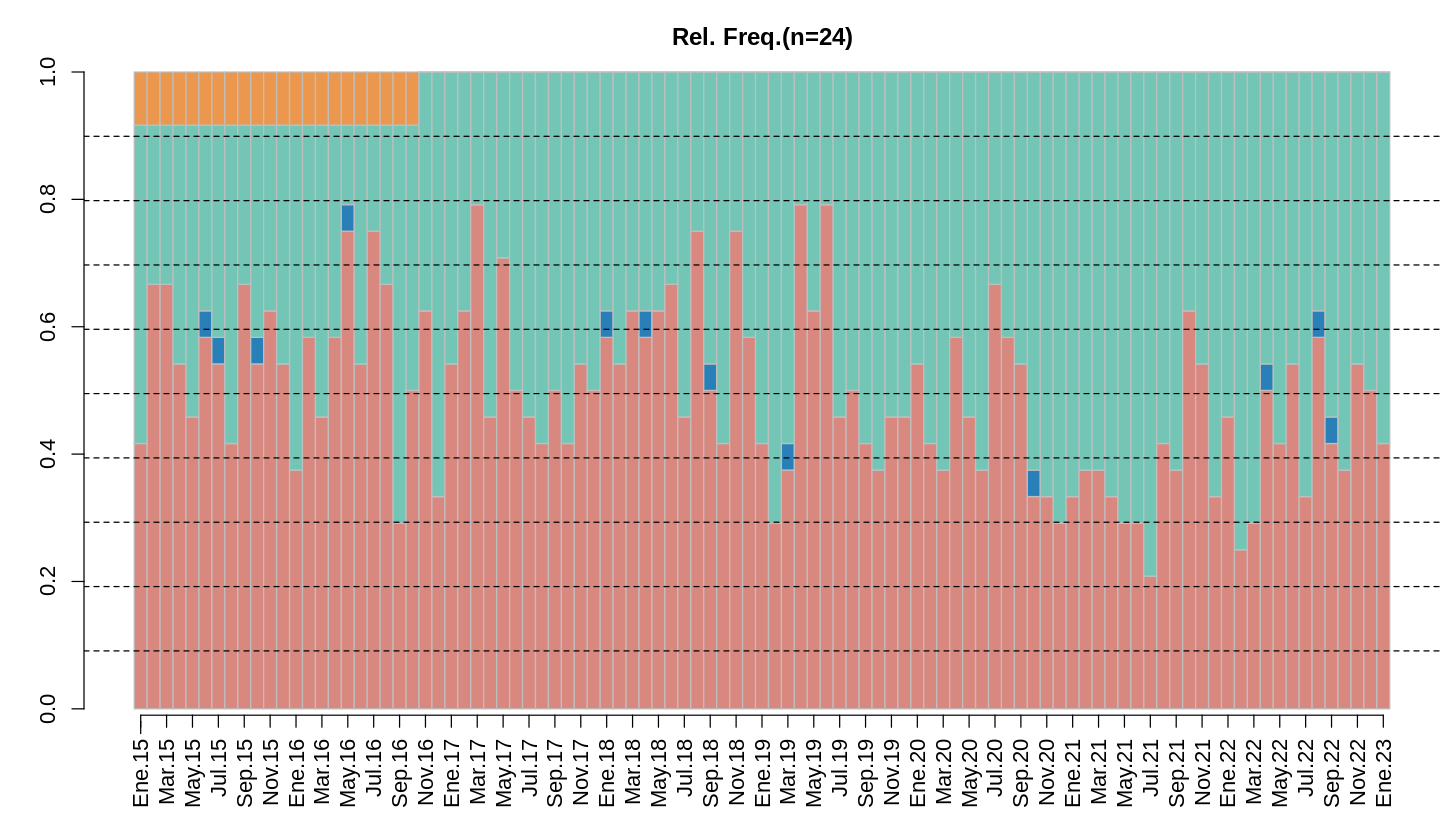

In [ ]:
#*********Distribución de estados (Porcentaje de cada estado en el tiempo)
par(mar = c(5.2, 3.5, 3.0, 0.0)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqdplot(ZNO.seq, with.legend = FALSE, border = "grey", cpal = colores, main = "Rel. Freq.(n=24)", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZNO.seq)), by = 2)-.5, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], las = 2, cex.axis = 1.1)

Warning message in plot.window(xlim, ylim, log = log, ...):
“"ytstep" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"ytstep" is not a graphical parameter”


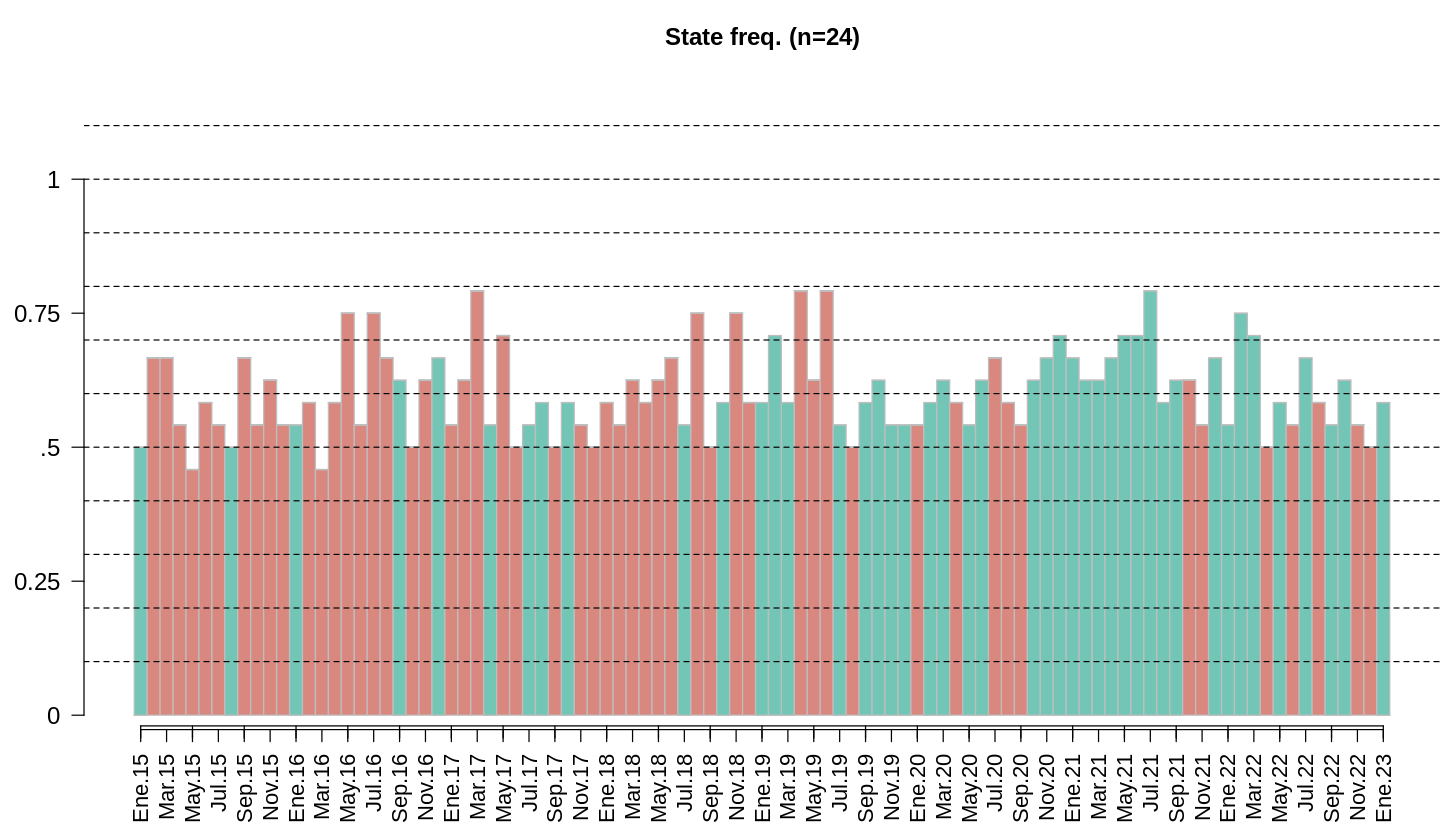

In [ ]:
#*********Distribución Temporal de los Estados Modales.
par(mar = c(5.2, 3.5, 3.0, 0.0)) #inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqmsplot(ZNO.seq, info = FALSE, with.legend = FALSE, border = "grey", cpal = colores, main = "State freq. (n=24)", ylab= " ", xtlab = FALSE, cex.axis = 1.2, ytstep = 2)
grid(nx = 0, ny = 12, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZNO.seq)), by = 2)-0.5, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], las = 2, cex.axis = 1.1, line = 0.6)

In [ ]:
#**********************Cálculo de distancias con Optimal Matching********
dist.om1 <- seqdist(ZNO.seq, method = "OM", indel = 1, sm = "TRATE")
cost_matrix <- seqsubm(ZNO.seq, method = "TRATE")

 [>] 24 sequences with 4 distinct states

 [>] Computing sm with seqcost using  TRATE

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states SO/IG/BA/SJ ...

 [>] 24 distinct  sequences 

 [>] min/max sequence lengths: 97/97

 [>] computing distances using the OM metric

 [>] elapsed time: 0.131 secs

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states SO/IG/BA/SJ ...



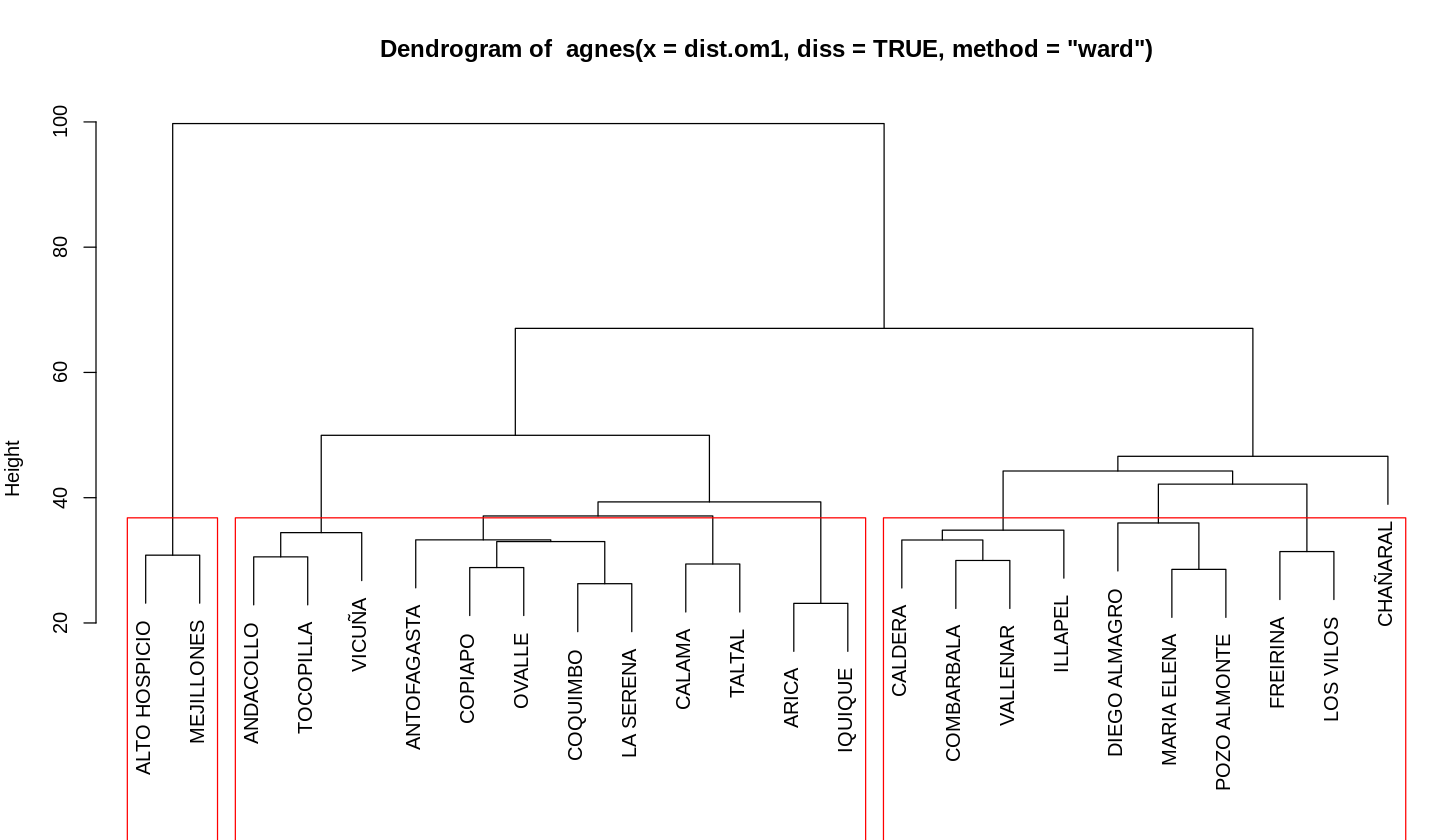

In [ ]:
# Clustering y Visualización del Dendrograma con Método Ward
par(mar = c(0.0, 4.0, 4.0, 0.1)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
clusterward1 <- agnes(dist.om1, diss = TRUE, method = "ward")
plot(clusterward1, which.plot = 2)
rect.hclust(clusterward1,k=3,border="red")

cl1.4 <- cutree(clusterward1, k = 3)
cl1.4fac <- factor(cl1.4, labels = paste("Type", 1:3))

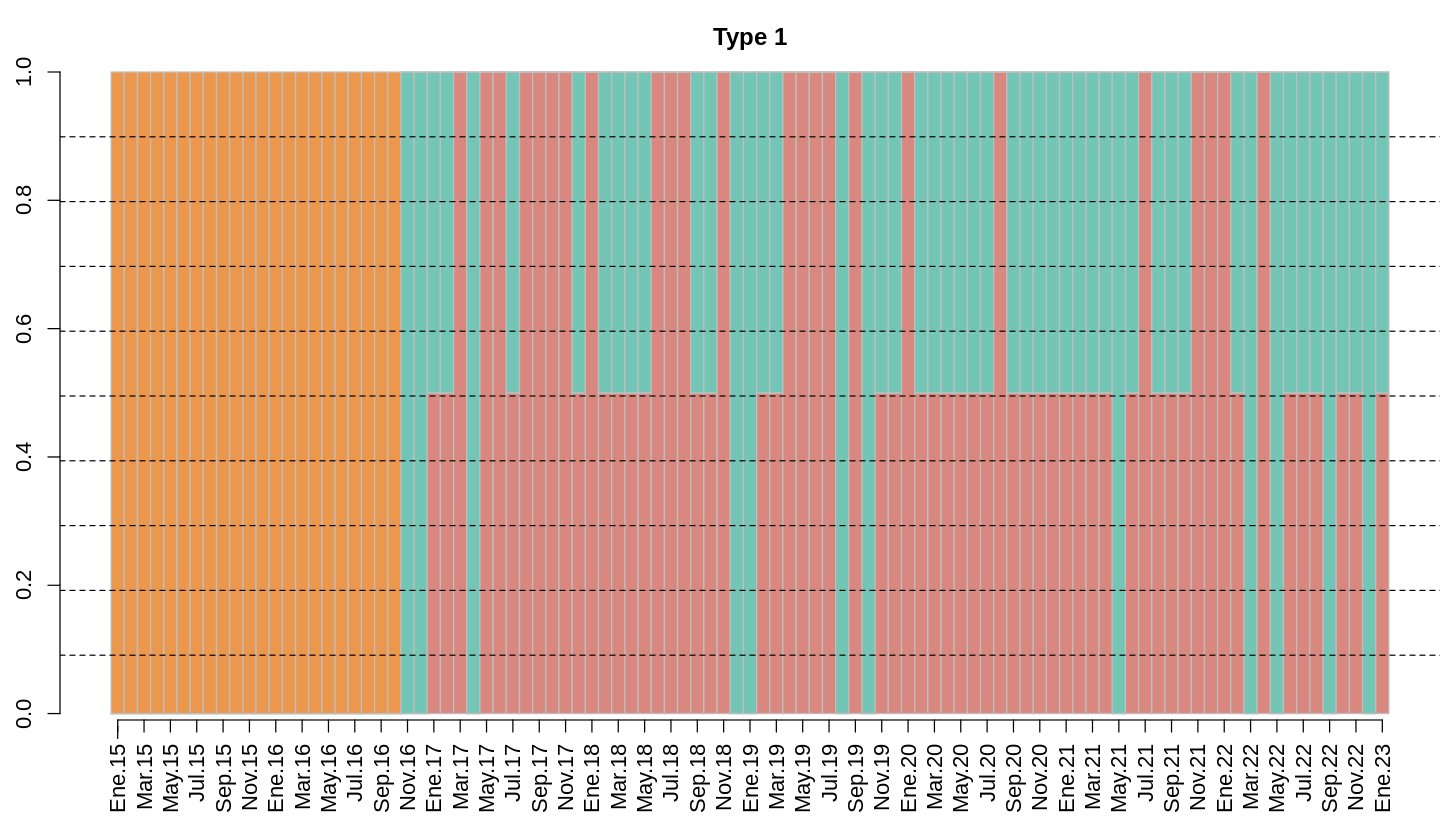

In [ ]:
# Visualización de Secuencia para Tipo 1
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqdplot(ZNO.seq[cl1.4fac == "Type 1",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 1", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = 10, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZNO.seq)), by = 2)-.5, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], las = 2, cex.axis = 1.1)


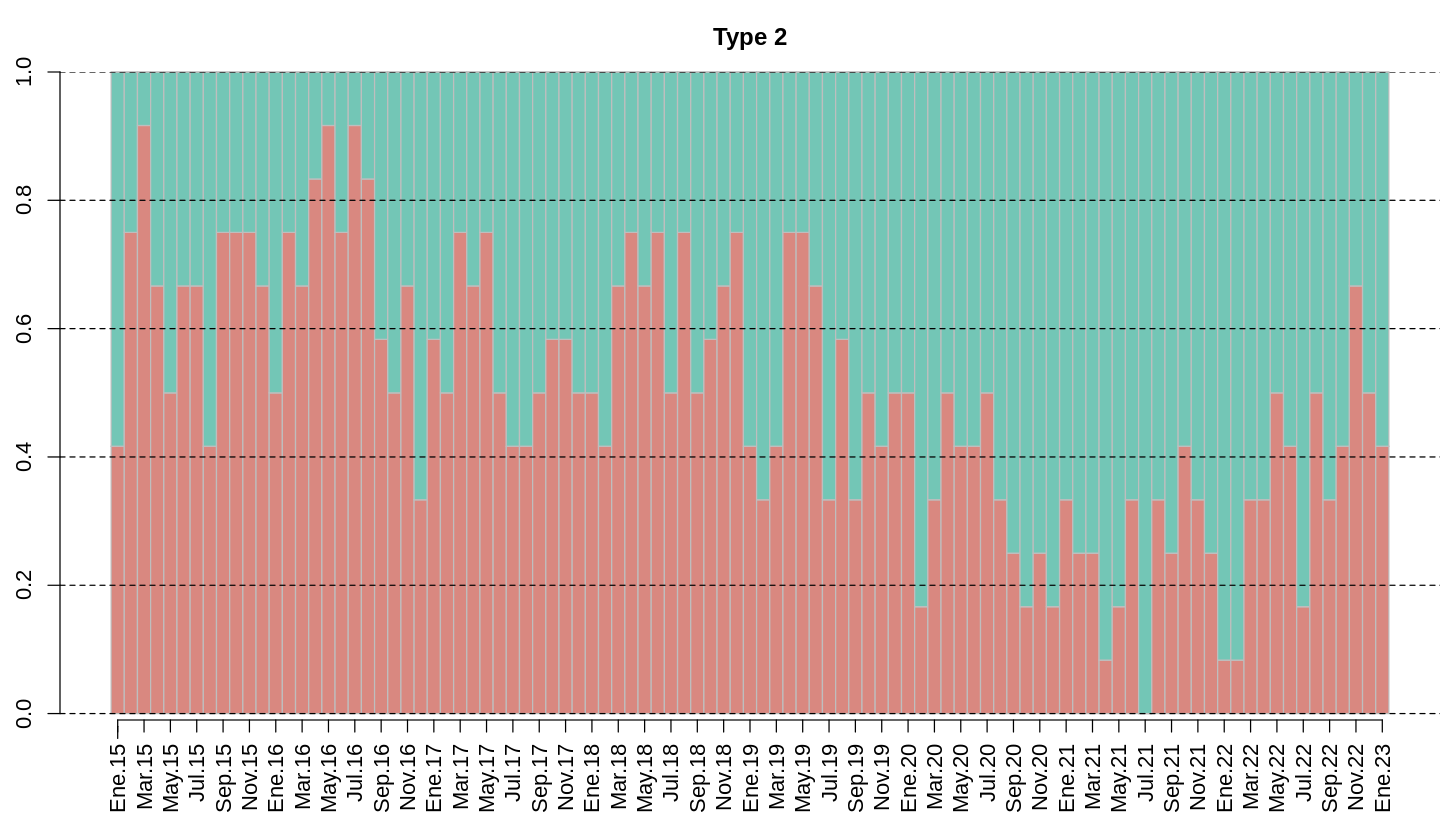

In [ ]:
# Visualización de Secuencia para Tipo 2
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqdplot(ZNO.seq[cl1.4fac == "Type 2",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 2", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = NULL, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZNO.seq)), by = 2)-.5, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], las = 2, cex.axis = 1.1)


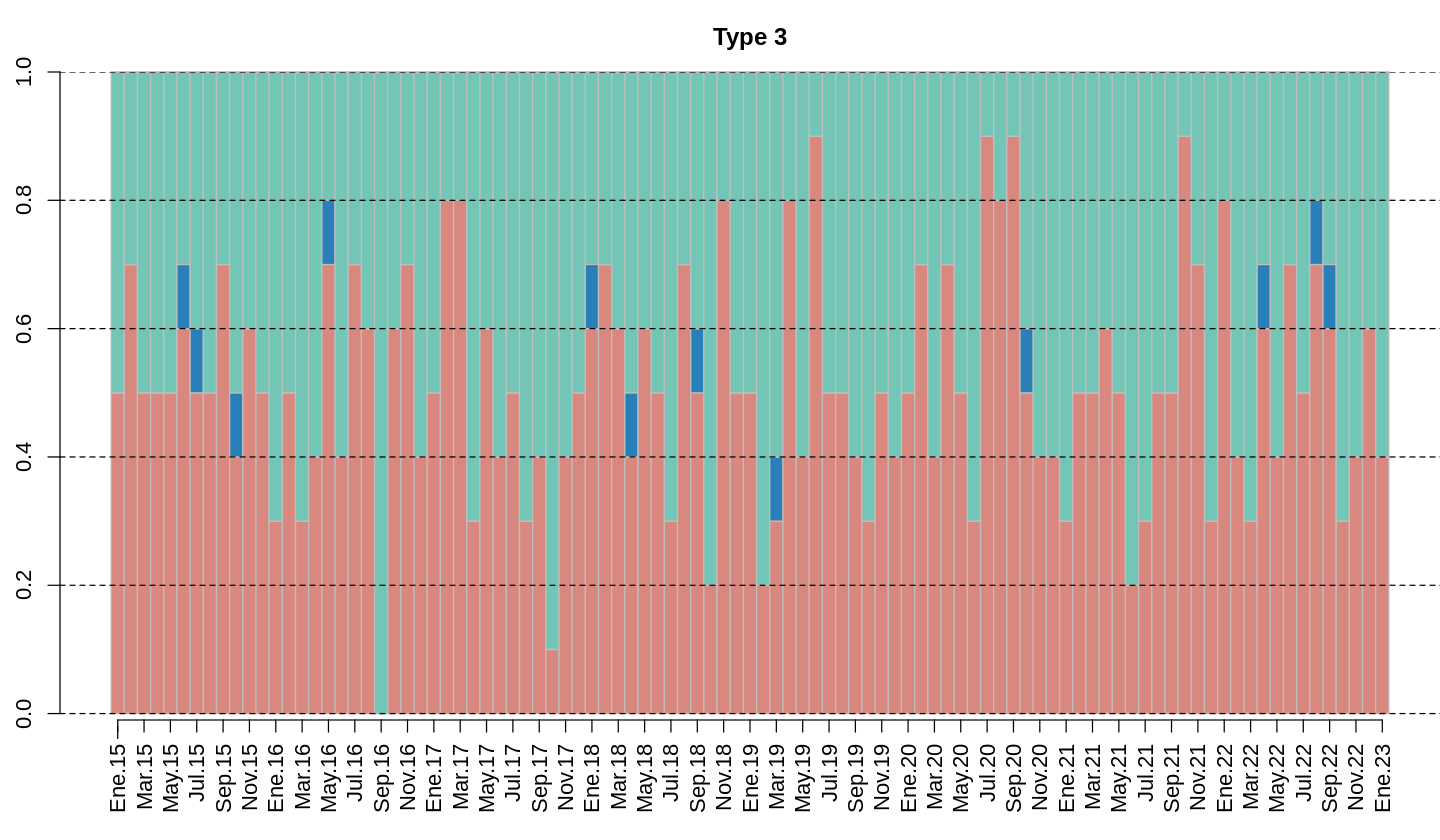

In [ ]:
# Visualización de Secuencia para Tipo 3
par(mar = c(5.0, 2.5, 3.0, 0.0)) #Bordes inferior, izquierdo, superior y derecho
options(repr.plot.width=12, repr.plot.height=7)
seqdplot(ZNO.seq[cl1.4fac == "Type 3",], with.legend = FALSE, border = "grey", cpal = colores, main = "Type 3", ylab= " ",xtlab = FALSE, cex.axis = 1.1);
grid(nx = 0, ny = NULL, lty = 2, col = "black", lwd = 1)
axis(side = 1, at = seq(1, length(colnames(ZNO.seq)), by = 2)-.5, labels = colnames(ZNO.seq)[seq(1, length(colnames(ZNO.seq)), by = 2)], las = 2, cex.axis = 1.1)